In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [122]:
#Read the sensor data file
columns = ['id','activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('sensorData.txt', header=None, names=columns)

In [123]:
#Display top 5 rows of data
df.head()

,id,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [124]:
# To remove extra ; in last column(z-axis)
df['z-axis'].replace(regex=True,inplace=True,to_replace=r';',value=r'')

#Now data type has been changed to string => convert it to float64

df['z-axis'] = df['z-axis'].astype(np.float64)

df['z-axis'].dtype

dtype('float64')

In [125]:
#To view datatypes of all columns
df.dtypes

id             int64
activity      object
timestamp      int64
x-axis       float64
y-axis       float64
z-axis       float64
dtype: object

In [126]:
#To remove any row having null value
df.dropna(axis=0, how='any', inplace=True)

In [127]:
print('Number of rows in dataframe {}'.format(df.shape[0]))
print('Number of columns in dataframe {}'.format(df.shape[1]))

Number of rows in dataframe 1098203
Number of columns in dataframe 6


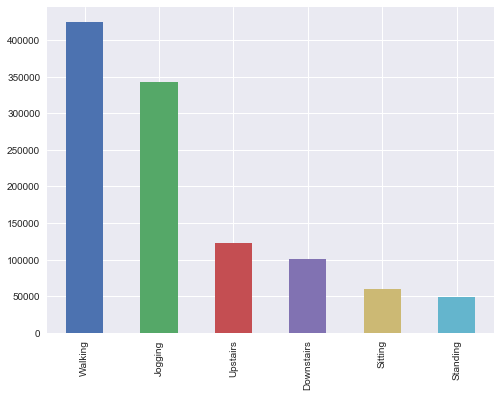

In [128]:
df['activity'].value_counts().plot(kind='bar', figsize=(8, 6))


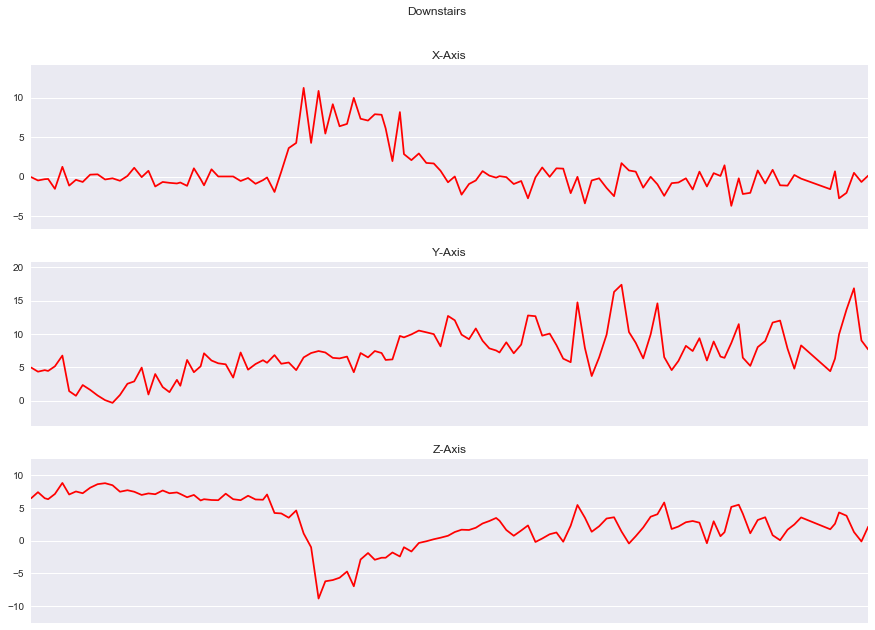

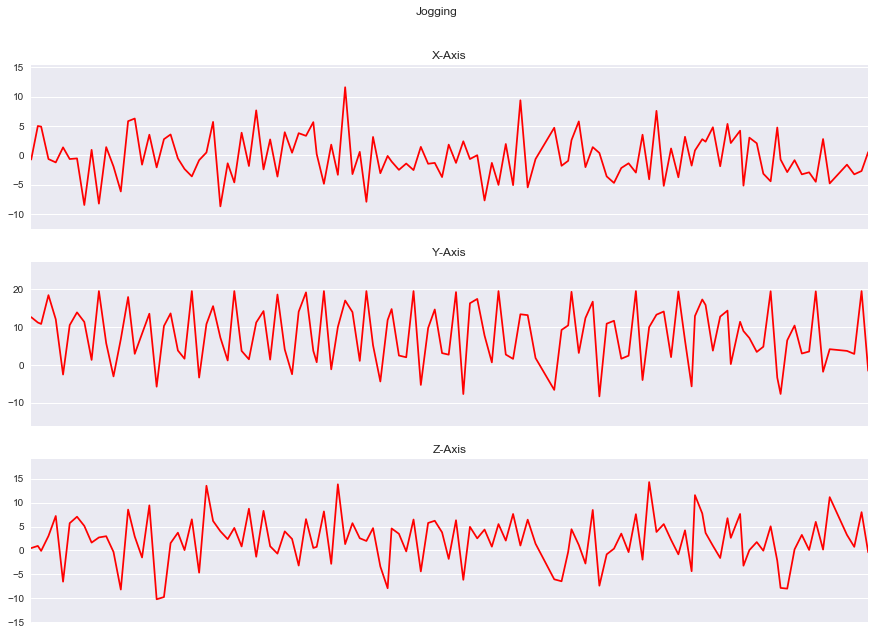

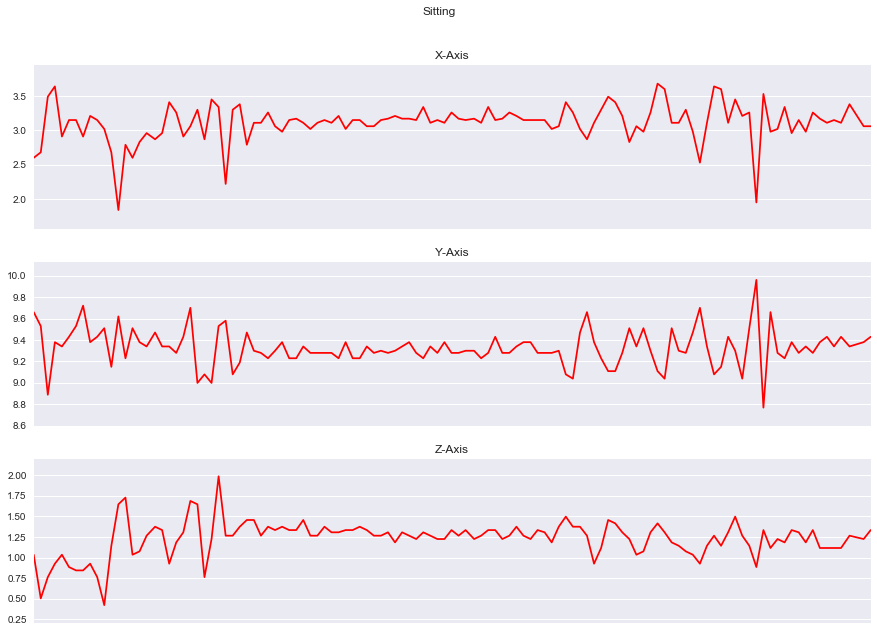

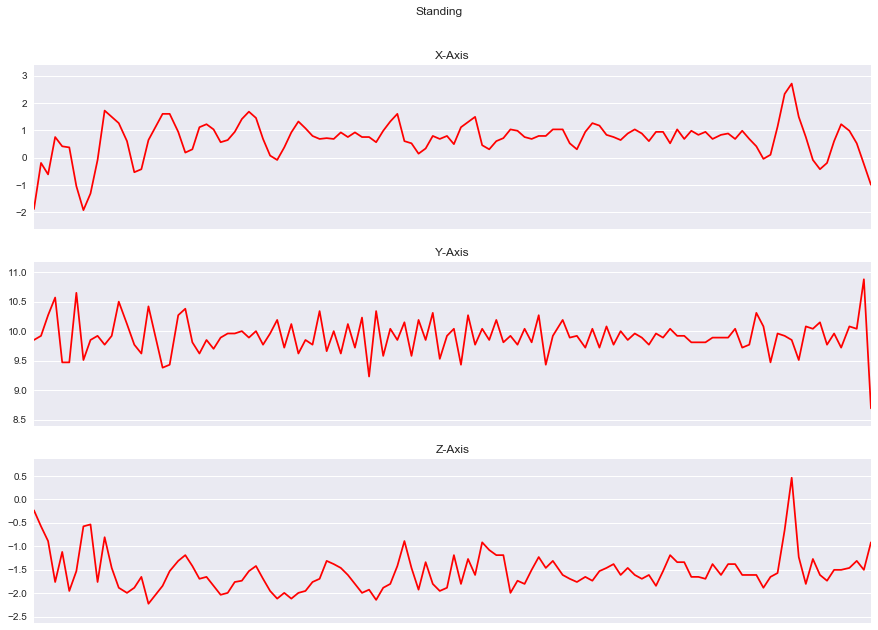

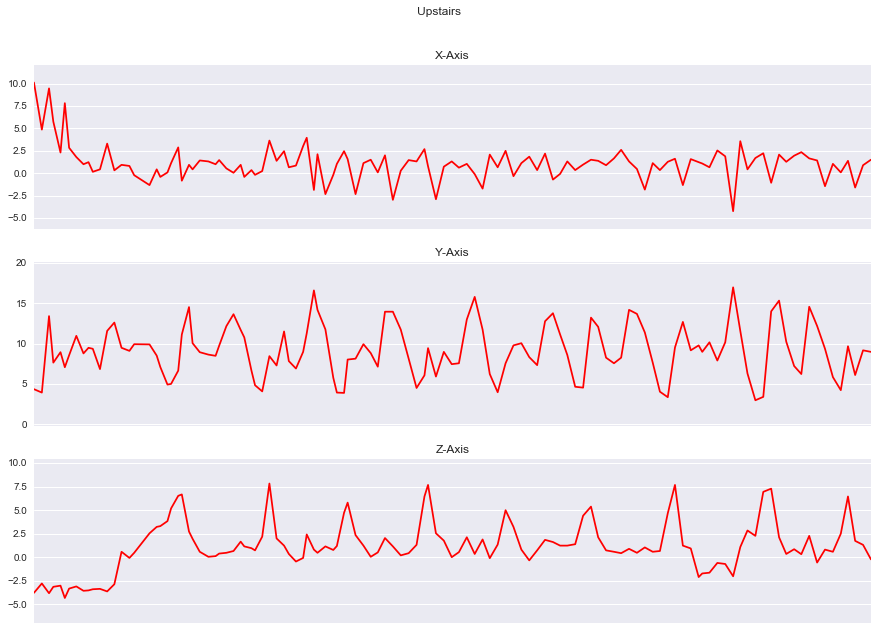

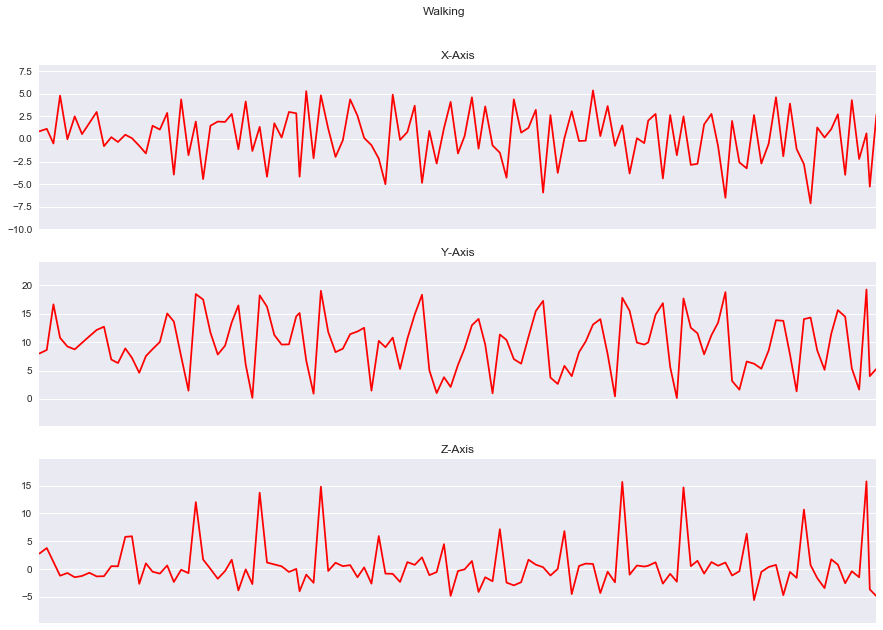

In [129]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['timestamp'], data['x-axis'], 'X-Axis')
    plot_axis(ax1, data['timestamp'], data['y-axis'], 'Y-Axis')
    plot_axis(ax2, data['timestamp'], data['z-axis'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(df['activity']):
    subset = df[df['activity'] == activity][:120]
    plot_activity(activity, subset)

In [130]:
label_encoder = preprocessing.LabelEncoder()
df['ActivityEncoded'] = label_encoder.fit_transform(df['activity']) 

In [138]:
# Differentiate between test set and training set
df_test = df[df['id'] > 28]
df_train = df[df['id'] <= 28]

In [143]:
min_val = np.min(df_train[['x-axis','y-axis','z-axis']], axis=0)
max_val = np.max(df_train[['x-axis','y-axis','z-axis']], axis=0)

# Normalize features for training data set (values between 0 and 1)
# Surpress warning for next 3 operation
pd.options.mode.chained_assignment = None  # default='warn'
df_train['x-axis'] = df_train['x-axis'] / df_train['x-axis'].max()
df_train['y-axis'] = df_train['y-axis'] / df_train['y-axis'].max()
df_train['z-axis'] = df_train['z-axis'] / df_train['z-axis'].max()
# Round numbers
df_train = df_train.round({'x-axis': 4, 'y-axis': 4, 'z-axis': 4})

,id,activity,timestamp,x-axis,y-axis,z-axis,ActivityEncoded
8489,17,Walking,57869902574000,0.0287,0.4894,-0.0271,5
8490,17,Walking,57870012316000,-0.0000,0.5084,-0.0292,5
8491,17,Walking,57870122301000,-0.0116,0.4914,-0.0354,5
8492,17,Walking,57870222246000,0.0075,0.5029,-0.0257,5
8493,17,Walking,57870332292000,0.0075,0.5063,-0.0313,5
8494,17,Walking,57870442278000,0.0307,0.4968,-0.0354,5
8495,17,Walking,57870542253000,0.0055,0.4989,-0.0257,5
8496,17,Walking,57870592333000,-0.0055,0.5009,-0.0271,5
8497,17,Walking,57870702288000,-0.0041,0.5050,-0.0194,5
8498,17,Walking,57870812303000,0.0157,0.4989,-0.0313,5
